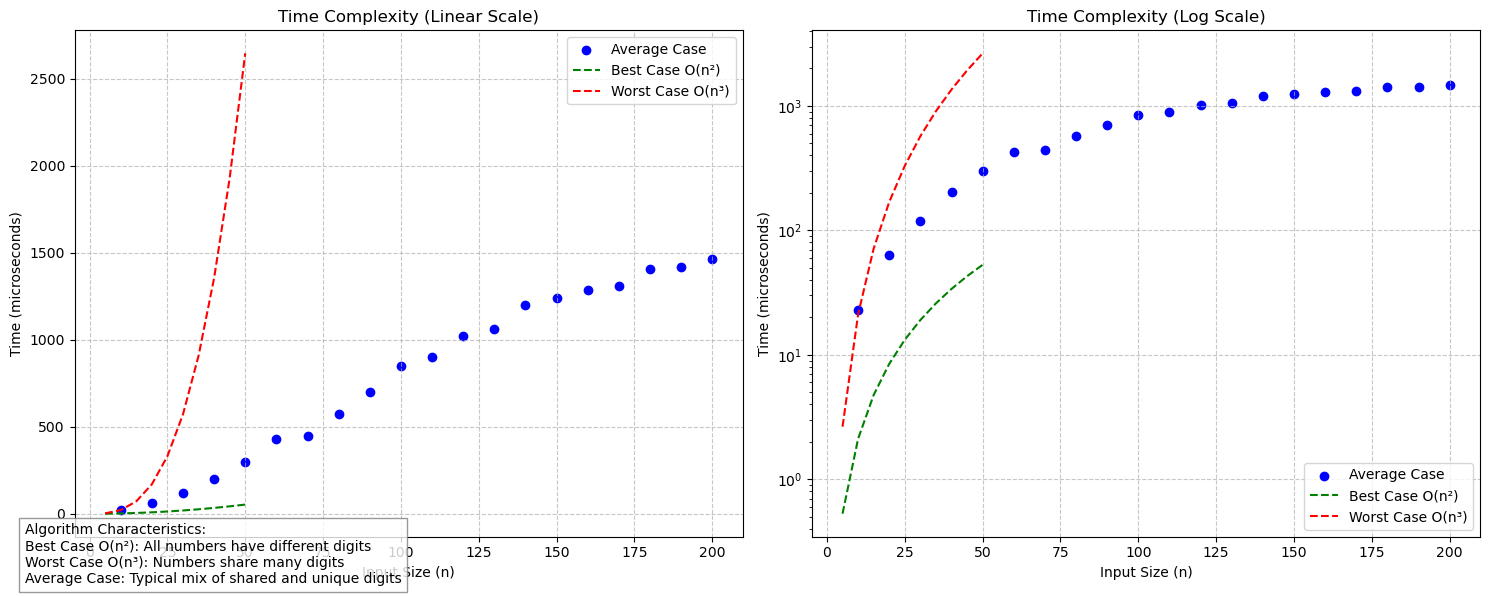

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Load the average case data
data = pd.read_csv('unique_digits_times.csv')

# Generate best and worst case data points
input_sizes = np.arange(5, 55, 5)
best_case = input_sizes**2  # O(n²)
worst_case = input_sizes**3  # O(n³)

# Scale theoretical curves to match actual data range
scale_factor = np.mean(data['Time (microseconds)']) / np.mean(worst_case)
best_case = best_case * scale_factor
worst_case = worst_case * scale_factor

# Plot 1: Linear scale
ax1.scatter(data['Input Size'], data['Time (microseconds)'], 
           c='blue', label='Average Case')
ax1.plot(input_sizes, best_case, 'g--', label='Best Case O(n²)')
ax1.plot(input_sizes, worst_case, 'r--', label='Worst Case O(n³)')
ax1.set_title('Time Complexity (Linear Scale)')
ax1.set_xlabel('Input Size (n)')
ax1.set_ylabel('Time (microseconds)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

# Plot 2: Log scale
ax2.scatter(data['Input Size'], data['Time (microseconds)'], 
           c='blue', label='Average Case')
ax2.plot(input_sizes, best_case, 'g--', label='Best Case O(n²)')
ax2.plot(input_sizes, worst_case, 'r--', label='Worst Case O(n³)')
ax2.set_title('Time Complexity (Log Scale)')
ax2.set_xlabel('Input Size (n)')
ax2.set_ylabel('Time (microseconds)')
ax2.set_yscale('log')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

# Add algorithm description
plt.figtext(0.02, 0.02, 
           "Algorithm Characteristics:\n" +
           "Best Case O(n²): All numbers have different digits\n" +
           "Worst Case O(n³): Numbers share many digits\n" +
           "Average Case: Typical mix of shared and unique digits",
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
           fontsize=10)

plt.tight_layout()

plt.savefig('../q2.png', dpi=300, bbox_inches='tight')

plt.show()